<a href="https://colab.research.google.com/github/alexiaddiaz0907/DSC410/blob/master/DSC410_WEEK9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/alexiaddiaz0907/Data-/main/Car_Insurance_Claim.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


**EDA ANALYSIS **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
#Find the duplicates

df.duplicated().sum()

0

In [ ]:
#Find null values
df.isnull().sum()


ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

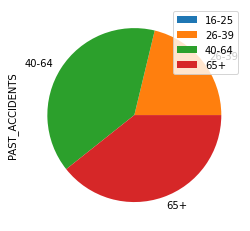

In [ ]:
df.groupby(['AGE']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

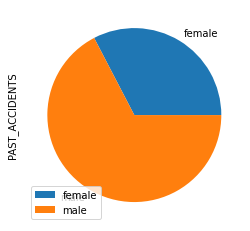

In [ ]:
df.groupby(['GENDER']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

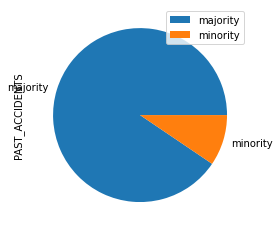

In [ ]:
df.groupby(['RACE']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

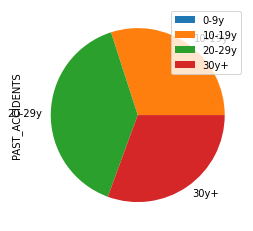

In [ ]:
df.groupby(['DRIVING_EXPERIENCE']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

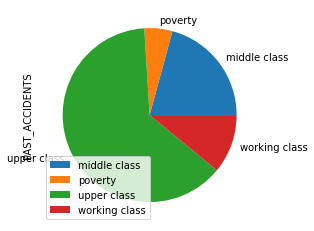

In [ ]:
df.groupby(['INCOME']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

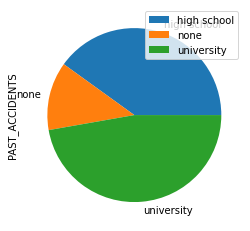

In [ ]:
df.groupby(['EDUCATION']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

In [ ]:
#unique values

df['DRIVING_EXPERIENCE'].unique()


array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [ ]:
df['CREDIT_SCORE'].unique()

array([0.62902731, 0.35775712, 0.49314579, ..., 0.47094023, 0.36418478,
       0.43522478])

In [ ]:
df['AGE'].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [ ]:
df['EDUCATION'].unique()

array(['high school', 'none', 'university'], dtype=object)

In [ ]:
df['INCOME'].unique()

array(['upper class', 'poverty', 'working class', 'middle class'],
      dtype=object)

In [ ]:
df['VEHICLE_YEAR'].unique()

array(['after 2015', 'before 2015'], dtype=object)

In [ ]:
df['VEHICLE_TYPE'].unique()

array(['sedan', 'sports car'], dtype=object)

In [ ]:
df['RACE'].unique()

array(['majority', 'minority'], dtype=object)

In [ ]:
df['POSTAL_CODE'].unique()

array([10238, 32765, 92101, 21217])

In [ ]:
df['PAST_ACCIDENTS'].unique()

array([ 0,  1,  3,  7,  2,  5,  4,  6,  8, 10, 11,  9, 12, 14, 15])

<AxesSubplot:>

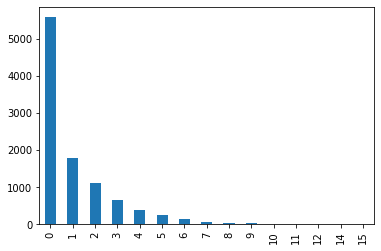

In [ ]:
fig, ax = plt.subplots()
df['PAST_ACCIDENTS'].value_counts().plot(ax=ax, kind='bar')

In [ ]:
df.drop(df[df['PAST_ACCIDENTS'] > 2].index, inplace = True)
print(df['PAST_ACCIDENTS'])

0       0
1       0
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: PAST_ACCIDENTS, Length: 7367, dtype: int64


In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['DRIVING_EXPERIENCE']= label_encoder.fit_transform(df['DRIVING_EXPERIENCE'])
df['AGE']= label_encoder.fit_transform(df['AGE'])
df['EDUCATION']= label_encoder.fit_transform(df['EDUCATION'])
df['INCOME']= label_encoder.fit_transform(df['INCOME'])
df['VEHICLE_YEAR']= label_encoder.fit_transform(df['VEHICLE_YEAR'])
df['VEHICLE_TYPE']= label_encoder.fit_transform(df['VEHICLE_TYPE'])
df['RACE']= label_encoder.fit_transform(df['RACE'])
df['POSTAL_CODE']= label_encoder.fit_transform(df['POSTAL_CODE'])
df['GENDER']= label_encoder.fit_transform(df['GENDER'])


  


In [ ]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,0,12000.0,0,0,0,0,0.0
1,750365,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,0,16000.0,0,0,0,0,1.0
2,199901,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,0,11000.0,0,0,0,0,0.0
3,478866,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,2,11000.0,0,0,0,0,0.0
4,731664,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,2,12000.0,0,2,0,1,1.0


In [ ]:
df.describe()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000,7367.000000
mean,502809.724854,1.252206,0.436541,0.099091,0.748337,0.946111,1.529659,0.502250,0.667436,0.716574,0.439256,0.634451,0.720918,11985.256507,0.049817,0.941089,0.158545,0.242025,0.392426
std,291428.704597,1.005780,0.495990,0.298804,0.854419,0.885028,1.031757,0.133166,0.471164,0.450692,0.496330,0.481616,1.037853,2694.725773,0.217581,1.725786,0.452888,0.428339,0.488324
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250726.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.411815,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,507424.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.502250,1.000000,1.000000,0.000000,1.000000,0.000000,12000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,756368.500000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.596822,1.000000,1.000000,1.000000,1.000000,2.000000,14000.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,3.000000,1.000000,1.000000,3.000000,2.000000,3.000000,0.960819,1.000000,1.000000,1.000000,1.000000,3.000000,22000.000000,1.000000,19.000000,4.000000,1.000000,1.000000


In [ ]:
#Finding the mean of the column having NaN
mean_value=df['CREDIT_SCORE'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df['CREDIT_SCORE'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
          ID  AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  \
0     569520    3       0     0                   0          0       2   
1     750365    0       1     0                   0          1       1   
2     199901    0       0     0                   0          0       3   
3     478866    0       1     0                   0          2       3   
4     731664    1       1     0                   1          1       3   
...      ...  ...     ...   ...                 ...        ...     ...   
9995  323164    1       0     0                   1          2       2   
9996  910346    1       0     0                   1          1       0   
9997  468409    1       1     0                   0          0       0   
9998  903459    1       0     0                   1          0       1   
9999  442696    1       0     0                   0          1       3   

      CREDIT_SCORE  VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  \
0         0.629027

In [ ]:
#Finding the mean of the column having NaN
mean_value=df['ANNUAL_MILEAGE'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df['ANNUAL_MILEAGE'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
          ID  AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  \
0     569520    3       0     0                   0          0       2   
1     750365    0       1     0                   0          1       1   
2     199901    0       0     0                   0          0       3   
3     478866    0       1     0                   0          2       3   
4     731664    1       1     0                   1          1       3   
...      ...  ...     ...   ...                 ...        ...     ...   
9995  323164    1       0     0                   1          2       2   
9996  910346    1       0     0                   1          1       0   
9997  468409    1       1     0                   0          0       0   
9998  903459    1       0     0                   1          0       1   
9999  442696    1       0     0                   0          1       3   

      CREDIT_SCORE  VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  \
0         0.629027

In [ ]:
#check for missing values again

#Find null values
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [ ]:
df.corr()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.017874,-0.006861,-0.003554,0.010602,-0.000543,-0.008926,0.006526,0.012912,0.002712,0.021653,0.002353,0.004097,-0.006360,0.008448,0.016118,0.008353,0.011686,-0.014201
AGE,0.017874,1.000000,-0.086294,-0.010891,0.603724,0.164581,0.139314,0.487136,0.260955,-0.255585,0.370635,0.359349,0.065748,-0.245040,0.000894,0.380150,0.237366,0.292848,-0.400556
GENDER,-0.006861,-0.086294,1.000000,-0.008863,-0.143726,0.067516,-0.001694,-0.119957,-0.019446,0.023381,-0.027379,-0.044553,0.028886,0.011120,0.008541,0.091269,0.018808,0.033642,0.196718
RACE,-0.003554,-0.010891,-0.008863,1.000000,-0.021422,-0.049622,0.006319,-0.042924,-0.041685,0.029135,-0.017994,0.005519,0.006011,0.000153,0.007588,-0.021850,-0.024817,-0.007084,0.010727
DRIVING_EXPERIENCE,0.010602,0.603724,-0.143726,-0.021422,1.000000,0.080805,0.059596,0.303664,0.175166,-0.157402,0.207566,0.214531,0.095467,-0.116934,0.006105,0.620981,0.397479,0.505864,-0.458603
EDUCATION,-0.000543,0.164581,0.067516,-0.049622,0.080805,1.000000,0.067093,0.211624,0.126962,-0.128150,0.114161,0.075764,0.026043,-0.083304,0.004778,0.077917,0.046044,0.057329,-0.094303
INCOME,-0.008926,0.139314,-0.001694,0.006319,0.059596,0.067093,1.000000,0.078084,0.038445,-0.068046,0.048255,0.046547,0.029157,-0.045832,-0.017770,0.040399,0.036421,-0.005340,-0.043987
CREDIT_SCORE,0.006526,0.487136,-0.119957,-0.042924,0.303664,0.211624,0.078084,1.000000,0.294719,-0.284837,0.264920,0.200180,0.035062,-0.155098,-0.007156,0.183318,0.114883,0.139571,-0.296781
VEHICLE_OWNERSHIP,0.012912,0.260955,-0.019446,-0.041685,0.175166,0.126962,0.038445,0.294719,1.000000,-0.166474,0.168457,0.115708,0.012562,-0.084224,0.009337,0.111807,0.072169,0.096840,-0.380911
VEHICLE_YEAR,0.002712,-0.255585,0.023381,0.029135,-0.157402,-0.128150,-0.068046,-0.284837,-0.166474,1.000000,-0.130382,-0.105866,-0.000791,0.071436,0.026328,-0.084131,-0.037884,-0.108053,0.319766


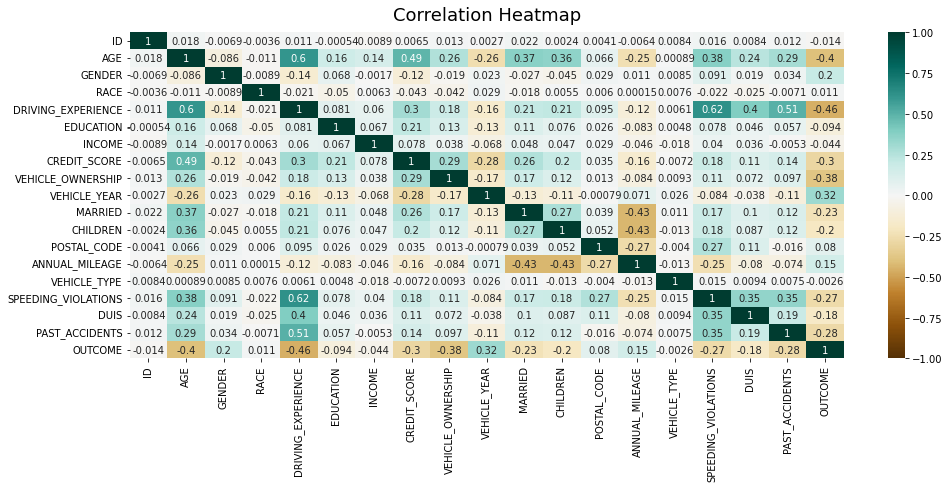

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
df.drop(['OUTCOME', 'ID' ], axis = 1)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,0,12000.000000,0,0,0,0
1,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,0,16000.000000,0,0,0,0
2,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,0,11000.000000,0,0,0,0
3,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,2,11000.000000,0,0,0,0
4,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,2,12000.000000,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,2,2,0.582787,1.0,1,0.0,0.0,0,16000.000000,0,0,0,1
9996,1,0,0,1,1,0,0.522231,1.0,0,0.0,1.0,2,11985.256507,0,1,0,0
9997,1,1,0,0,0,0,0.470940,1.0,1,0.0,1.0,0,14000.000000,0,0,0,0
9998,1,0,0,1,0,1,0.364185,0.0,1,0.0,1.0,0,13000.000000,0,2,0,1


**Modeling **

In [ ]:
#split dataset in features and target variable
feature_cols = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE','MARRIED','CHILDREN','SPEEDING_VIOLATIONS', 'POSTAL_CODE','DUIS','CREDIT_SCORE', 'VEHICLE_OWNERSHIP']
X = df[feature_cols] # Features
y = df.PAST_ACCIDENTS # Target variable

#print(df[feature_cols])
print(df.PAST_ACCIDENTS)

0       0
1       0
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: PAST_ACCIDENTS, Length: 7367, dtype: int64


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
print(y_pred)

[1 1 1 ... 0 0 0]


In [ ]:
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(y_pred,y_test)

array([[1228,  301],
       [ 151,  162]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1529
           1       0.35      0.52      0.42       313

    accuracy                           0.75      1842
   macro avg       0.62      0.66      0.63      1842
weighted avg       0.80      0.75      0.77      1842



In [ ]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
print('The accuracy of the Logistic Regression is', accuracy_score(y_pred,y_test))

The accuracy of the Logistic Regression is 0.754614549402823


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

models = {
    "xTree": ExtraTreesClassifier(),
    "rfClassifier": RandomForestClassifier(),
    "tree": DecisionTreeClassifier(max_depth = 5, criterion = "gini"),
    "knClassifier": KNeighborsClassifier(n_neighbors = 5),
}

accuracy_scores = []
predicted = []

for i in models:
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    accuracy_scores.append(int(accuracy_score(y_pred, y_test) * 100))
    predicted.append(y_pred)

for j, k in zip(accuracy_scores, models):
    print (' \n ', k, ' accuracy : ', j, ' %  ')

 
  xTree  accuracy :  74  %  
 
  rfClassifier  accuracy :  75  %  
 
  tree  accuracy :  78  %  
 
  knClassifier  accuracy :  75  %  


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nb_predict=nb.predict(X_test)

In [ ]:
nb_report = accuracy_score(y_test,nb_predict)
print('Accuracy:',nb_report)

Accuracy: 0.747014115092291


In [ ]:
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1379
           1       0.50      0.42      0.45       463

    accuracy                           0.75      1842
   macro avg       0.66      0.64      0.64      1842
weighted avg       0.73      0.75      0.74      1842

